In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVR
from sklearn import datasets
from sklearn.metrics import mean_squared_error, r2_score
plt.style.use('fivethirtyeight')


In [2]:
#read in the data
data = pd.read_csv('DOGE-USD.csv')
#set the date as the index
data = data.set_index(pd.DatetimeIndex(data['Date']))
#show the data
data

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2019-01-01,2019-01-01,0.002346,0.002392,0.002322,0.002392,0.002392,17364744
2019-01-02,2019-01-02,0.002388,0.002458,0.002372,0.002407,0.002407,18015392
2019-01-03,2019-01-03,0.002404,0.002414,0.002356,0.002360,0.002360,17619234
2019-01-04,2019-01-04,0.002364,0.002397,0.002274,0.002315,0.002315,19530100
2019-01-05,2019-01-05,0.002320,0.002350,0.002280,0.002319,0.002319,17148586
...,...,...,...,...,...,...,...
2023-05-01,2023-05-01,0.079760,0.079996,0.077628,0.078820,0.078820,325694977
2023-05-02,2023-05-02,0.078822,0.079045,0.077832,0.078806,0.078806,234651604
2023-05-03,2023-05-03,0.078806,0.080527,0.077328,0.079713,0.079713,306950726


In [3]:
future_day= 30

In [4]:
#Create a new column
#data[str(future_day)+'_Day_Price_Forecast'] = data[["Close"]].shift(-future_day)
data[str(future_day)+'_Day_Price_Forecast'] = data[["Close"]].shift(-future_day)
#Show the data
data[['Close', str(future_day)+'_Day_Price_Forecast']]
#data



,Close,30_Day_Price_Forecast
Date,,
2019-01-01,0.002392,0.001925
2019-01-02,0.002407,0.001916
2019-01-03,0.002360,0.001936
2019-01-04,0.002315,0.001904
2019-01-05,0.002319,0.001896
...,...,...
2023-05-01,0.078820,NaN
2023-05-02,0.078806,NaN
2023-05-03,0.079713,NaN


In [5]:
X = np.array(data[['Close']])
X = X[:data.shape[0] - future_day]
print(X)

[[0.002392]
 [0.002407]
 [0.00236 ]
 ...
 [0.096079]
 [0.095159]
 [0.092817]]


In [6]:
Y = np.array(data[str(future_day)+'_Day_Price_Forecast'])
Y = Y[:- future_day]
print(Y)

[0.001925 0.001916 0.001936 ... 0.079713 0.078449 0.078835]


In [7]:
val = np.array(data[['Close']])
val = val[- future_day:]
val


array([[0.085412],
       [0.082456],
       [0.081405],
       [0.08329 ],
       [0.084852],
       [0.084237],
       [0.083433],
       [0.087484],
       [0.088785],
       [0.088974],
       [0.090472],
       [0.091449],
       [0.093989],
       [0.087868],
       [0.083937],
       [0.078479],
       [0.080375],
       [0.07882 ],
       [0.078784],
       [0.079847],
       [0.078623],
       [0.08019 ],
       [0.080364],
       [0.08163 ],
       [0.079769],
       [0.07882 ],
       [0.078806],
       [0.079713],
       [0.078449],
       [0.078835]])

In [8]:
#Split the data
#Chia tập dữ liệu thành tập train, test và predict theo tỷ lệ 7-1-2
X_train = X[:int(X.shape[0]*0.6)]
Y_train = Y[:int(Y.shape[0]*0.6)]

X_test = X[int(X.shape[0]*0.6):int(X.shape[0]*0.9)]
Y_test = Y[int(Y.shape[0]*0.6):int(Y.shape[0]*0.9)]

X_val = X[int(X.shape[0]*0.9):]
Y_val = Y[int(Y.shape[0]*0.9):]



In [9]:
len(X_test)

467

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

X_pred = scaler.transform(data[['Close']])

c:\APP\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from scipy.stats import uniform, randint
svr = SVR()
# Tạo dictionary chứa các giá trị hyperparameters để thử nghiệm
param_grid = {'C':[0.01, 0.1, 1, 10 ,100],
              'gamma': [0.01, 0.1, 1, 10 ,100],
              'kernel': ['linear', 'rbf','sigmoid']}

In [12]:
X_Grid = np.concatenate([X_train_scaled,X_val_scaled])
Y_Grid = np.concatenate([Y_train,Y_val])

In [13]:
X_Grid.shape

(1089, 1)

In [14]:
# Tạo một đối tượng GridSearchCV với model là SVR, dictionary chứa các hyperparameters, và 5 fold cross validation
grid_search = GridSearchCV(svr, param_grid, refit=True, cv=8, scoring='neg_mean_squared_error')

In [15]:
# Huấn luyện đối tượng GridSearchCV
grid_search.fit(X_train_scaled, Y_train)

GridSearchCV(cv=8, estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [0.01, 0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf', 'sigmoid']},
             scoring='neg_mean_squared_error')

In [16]:
# In ra bộ hyperparameters tốt nhất
best_para=grid_search.best_params_
kernel_best=best_para['kernel']
C_best=best_para['C']
gamma_best=best_para['gamma']
print(best_para)

{'C': 0.01, 'gamma': 10, 'kernel': 'sigmoid'}


In [17]:
grid_search.best_score_


-0.004953389360928979

In [18]:
from sklearn.svm import SVR
svr_linear = SVR(kernel=kernel_best, C= C_best, gamma= gamma_best)
svr_linear.fit(X_train_scaled, Y_train)

SVR(C=0.01, gamma=10, kernel='sigmoid')

In [19]:
svr_linear_confidence = svr_linear.score(X_train_scaled, Y_train)
print('svr_rbf accuracy: ', svr_linear_confidence)

svr_rbf accuracy:  -0.8532876440531019


In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score


X_test_pred = svr_linear.predict(X_test_scaled)

val_mse = mean_squared_error(Y_test, X_test_pred)
val_rmse = np.sqrt(val_mse)

# Tính toán giá trị MAPE
mape = mean_absolute_percentage_error(Y_test, X_test_pred)

# Tính toán R2 giữa giá trị thực tế (y_true) và giá trị dự đoán (y_pred)
r2 = r2_score(Y_test, X_test_pred)

print("MAPE:", mape)
print("RMSE:", val_rmse)
print("R2-quare:", r2)

MAPE: 3.246593835912742
RMSE: 0.32843924104606614
R2-quare: -20.39991963765152


In [21]:
from sklearn.metrics import mean_squared_error
# Tính toán giá trị RMSE
X_val_pred = svr_linear.predict(X_val_scaled)
rmse = mean_squared_error(Y_val, X_val_pred, squared= False)
rmse
# Tính toán giá trị MAPE
mape = mean_absolute_percentage_error(Y_val, X_val_pred)
# Tính toán R2 giữa giá trị thực tế (y_true) và giá trị dự đoán (y_pred)
r2 = r2_score(Y_val, X_val_pred)
print("MAPE:", mape)
print("RMSE:", rmse)
print("R2-quare:", r2)

MAPE: 4.89146868500358
RMSE: 0.4031989350732058
R2-quare: -2358.011847800228


Dự đoán

In [22]:
# # 13. Dự báo 30 ngày tiếp theo
# # Khởi tạo danh sách đầu vào x_input từ tập dữ liệu test
# x_input = X_test[-future_day:].reshape(-1, 1)

# # Dự đoán giá cho 30 ngày tiếp theo
# lst_output = []
# for i in range(30):
#     # Dự đoán giá cho ngày tiếp theo
#     x_input = scaler.transform(x_input)
#     yhat = svr_linear.predict(x_input)
    
#     # Lưu giá dự đoán vào danh sách kết quả
#     lst_output.append(yhat[0])
    
    
#     # Cập nhật đầu vào x_input bằng cách đẩy dự đoán vào cuối và cắt bớt phần tử đầu tiên
#     # x_input = np.append(x_input[0][1:], yhat[0]).reshape(1, future_day)
#     # x_input =np.append(x_input[:,1:], yhat[0], axis=1)
#     x_input = np.append(x_input[:][1:], yhat[0]).reshape(-1, 1)

In [23]:
# Y_val_scaled = scaler.transform(Y_val)
# last_30_days = svr_linear.predict(Y_val_scaled)
# last_30_days= last_30_days.reshape(-1,1)
# # last_30_days = scaler.fit_transform(last_30_days)
# # last_30_days = svr_linear.predict(last_30_days)
# #test = last_30_days
# # last_30_days = last_30_days[-future_day:]
# print(last_30_days)
# last_30_days.shape

In [24]:
# 13. Dự báo 30 ngày tiếp theo
# Khởi tạo danh sách đầu vào x_input từ tập dữ liệu test
x_input = Y_val[-30:].reshape(-1, 1)
x_input = scaler.transform(x_input)
# Dự đoán giá cho 30 ngày tiếp theo
i=0
lst_output = []
for i in range(future_day):
    # Dự đoán giá cho ngày tiếp theO
    
    yhat = svr_linear.predict(x_input)
    print("{} day output {}".format(i,yhat[0]))
    print(x_input.shape)
    # Lưu giá dự đoán vào danh sách kết quả
    
    lst_output.append(yhat[0])
    
    # Cập nhật đầu vào x_input bằng cách đẩy dự đoán vào cuối và cắt bớt phần tử đầu tiên
    # x_input = np.append(x_input[0][1:], yhat[0]).reshape(1, future_day)
    # x_input =np.append(x_input[:,1:], yhat[0], axis=1)
    yhat = yhat.reshape(-1,1)
    yhat = scaler.transform(yhat)
    x_input = np.append(x_input[1:], yhat[0]).reshape(-1, 1)
    i=i+1

0 day output 0.46769302983697375
(30, 1)
1 day output 0.48549078104854615
(30, 1)
2 day output 0.4920336849222479
(30, 1)
3 day output 0.48037953603357625
(30, 1)
4 day output 0.47099696853791984
(30, 1)
5 day output 0.47466168159194033
(30, 1)
6 day output 0.4795102822221978
(30, 1)
7 day output 0.45573910487985336
(30, 1)
8 day output 0.448447834197808
(30, 1)
9 day output 0.4474021834082198
(30, 1)
10 day output 0.43923471025700184
(30, 1)
11 day output 0.43402161803200845
(30, 1)
12 day output 0.4208794570906739
(30, 1)
13 day output 0.4535699819988735
(30, 1)
14 day output 0.4764631967507688
(30, 1)
15 day output 0.5108538838975178
(30, 1)
16 day output 0.498556777441826
(30, 1)
17 day output 0.508614418452239
(30, 1)
18 day output 0.5088502659025624
(30, 1)
19 day output 0.5019434784415694
(30, 1)
20 day output 0.509906694695782
(30, 1)
21 day output 0.49974009398523067
(30, 1)
22 day output 0.49862703701540384
(30, 1)
23 day output 0.4906233798649495
(30, 1)
24 day output 0.5024

In [25]:
Y_test_pred= Y_test.reshape(-1,1)
print(Y_test_pred.shape)
Y_test_pred

(467, 1)


array([[0.316797],
       [0.314963],
       [0.317914],
       [0.288739],
       [0.292226],
       [0.268909],
       [0.294433],
       [0.285629],
       [0.281125],
       [0.272125],
       [0.278453],
       [0.294401],
       [0.295955],
       [0.296273],
       [0.299388],
       [0.314527],
       [0.308765],
       [0.253744],
       [0.257113],
       [0.252596],
       [0.239982],
       [0.241432],
       [0.250617],
       [0.235906],
       [0.240709],
       [0.247697],
       [0.242555],
       [0.23993 ],
       [0.241386],
       [0.233142],
       [0.207071],
       [0.201027],
       [0.224858],
       [0.224832],
       [0.209451],
       [0.20864 ],
       [0.204962],
       [0.200262],
       [0.196804],
       [0.198876],
       [0.204244],
       [0.22301 ],
       [0.219133],
       [0.221748],
       [0.240852],
       [0.252016],
       [0.255134],
       [0.242923],
       [0.243851],
       [0.246596],
       [0.229805],
       [0.231503],
       [0.22

In [26]:
print(X.shape)

(1556, 1)


In [27]:
X_train_pred = svr_linear.predict(X_train_scaled)

In [28]:
# Tạo biểu đồ
actual = np.arange(len(data['Close']))
Predict = np.arange(len(data['Close'])- 30, len(data['Close']))

#index X_train
index_X_train = np.arange(len(X_train_pred))
#index X_val
index_X_test = np.arange(len(X_train_pred), len(X_train_pred) + len(X_test_pred))

#index X_test
index_X_val = np.arange(len(X_train_pred) + len(X_test_pred),len(X_train_pred) + len(X_test_pred) + len(X_val_pred))

In [29]:
Predict

array([1556, 1557, 1558, 1559, 1560, 1561, 1562, 1563, 1564, 1565, 1566,
       1567, 1568, 1569, 1570, 1571, 1572, 1573, 1574, 1575, 1576, 1577,
       1578, 1579, 1580, 1581, 1582, 1583, 1584, 1585])

In [30]:
X_train_pred= X_train_pred.reshape(-1,1)
print(index_X_train.shape)

(933,)


In [31]:
lst_output = np.array(lst_output)

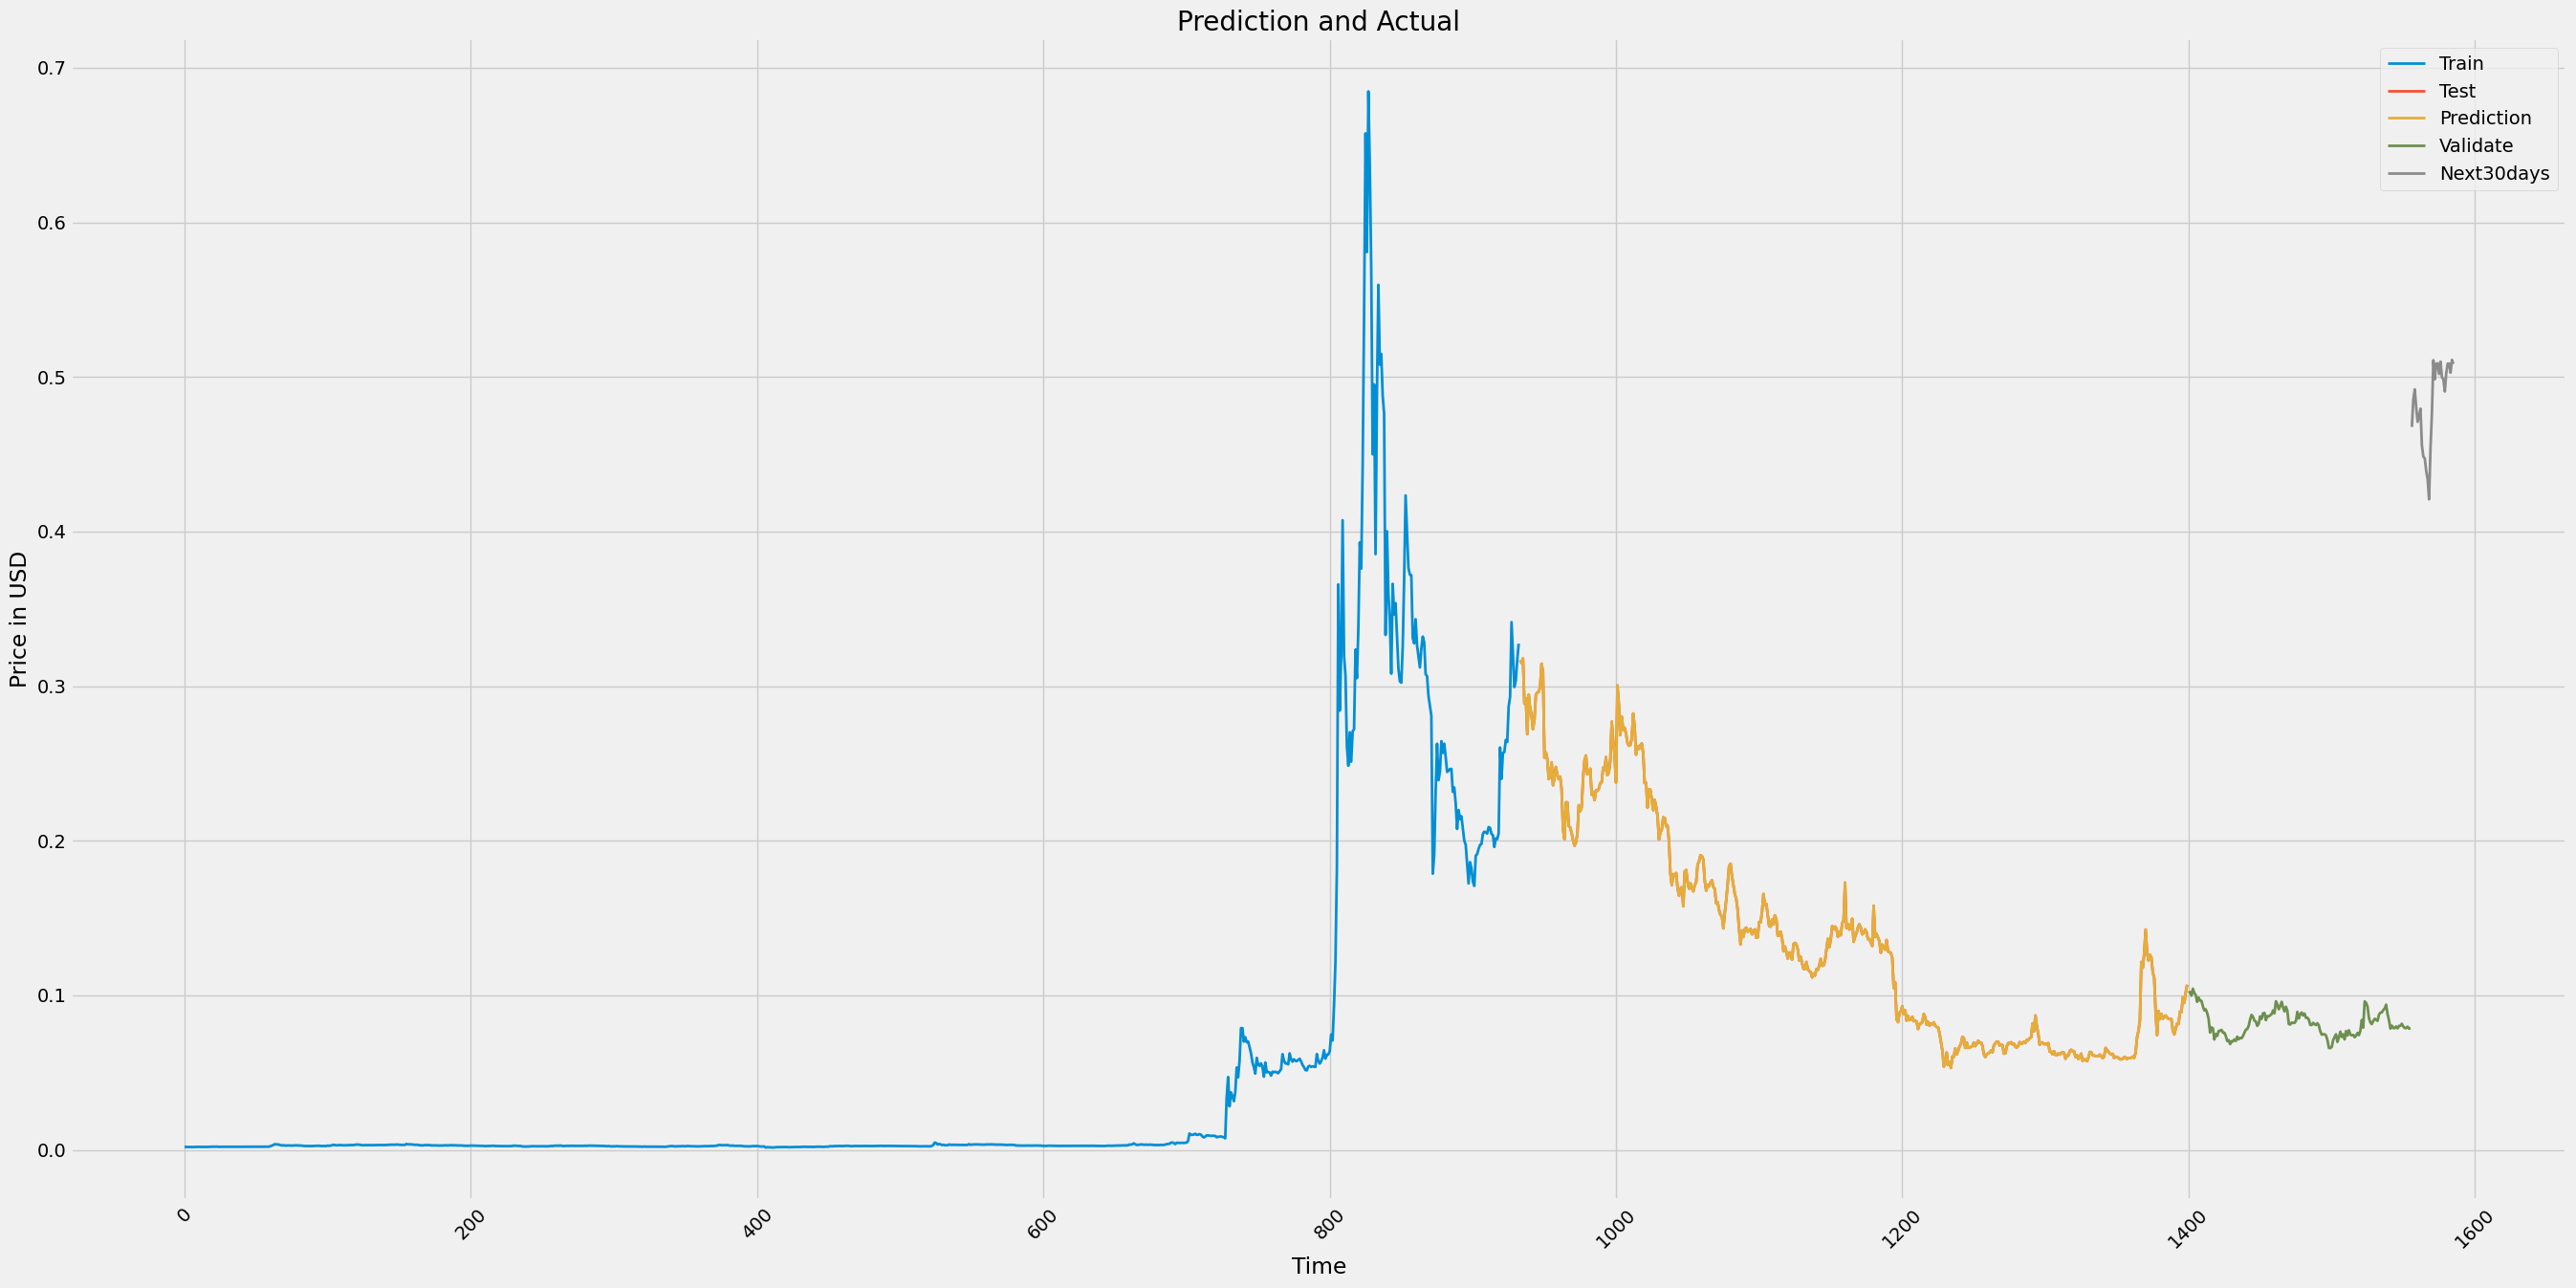

In [32]:
X_test_pred = X_test_pred.reshape(-1, 1)
Y_train = Y_train.reshape(-1, 1)
Y_val = Y_val.reshape(-1, 1)

plt.figure(figsize=(30,15))
plt.grid(True)

# last_30_days = last_30_days.reshape(-1, 1)
# aX_pred = np.concatenate([X,last_30_days])

# plt.plot(actual, data['Close'], label = 'Actual', lw=2)

plt.plot(index_X_train, Y_train, label = 'Train', lw=2)
plt.plot(index_X_test, Y_test, label = 'Test',lw=2)
plt.plot(index_X_test, Y_test_pred, label = 'Prediction', lw=2)
plt.plot(index_X_val, Y_val, label = 'Validate', lw=2)

plt.plot(Predict, lst_output[-30:], label = 'Next30days', lw=2)

plt.title('Prediction and Actual')
plt.ylabel('Price in USD')
plt.xlabel('Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()